<a href="https://colab.research.google.com/github/Manar-Hamed/Arabic_Sign_Language/blob/main/diff_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
np.random.seed(5) 
import tensorflow as tf
#tf.set_random_seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from google.colab import drive






In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip '/content/drive/MyDrive/ArASL_Database_54K_Final' -d'/content'


Streaming output truncated to the last 5000 lines.
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (449).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (45).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (450).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (451).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (452).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (453).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (454).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (455).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (456).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (457).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (458).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (459).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (46).JPG  
 extracting: /content/ArASL_Database_54K_Final/waw/WAW (460).JPG  
 extracting: 

In [5]:
train_dir = '/content/ArASL_Database_54K_Final'
eval_dir = '/content/ArASL_Database_54K_Final'

In [6]:
#Helper function to load images from given directories
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [7]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

if uniq_labels == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  32
Number of training images:  48644
Number of testing images:  5405
Number of evaluation images:  54049


In [9]:
#Helper function to print images
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


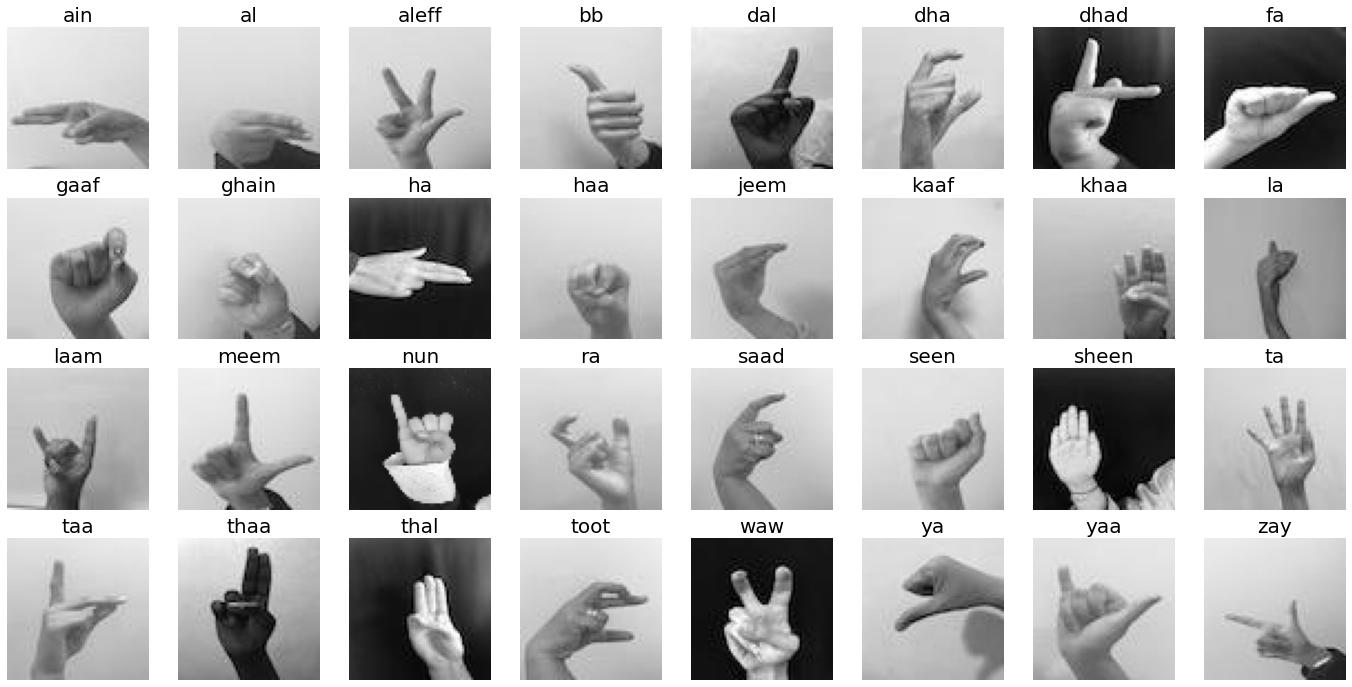

In [10]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


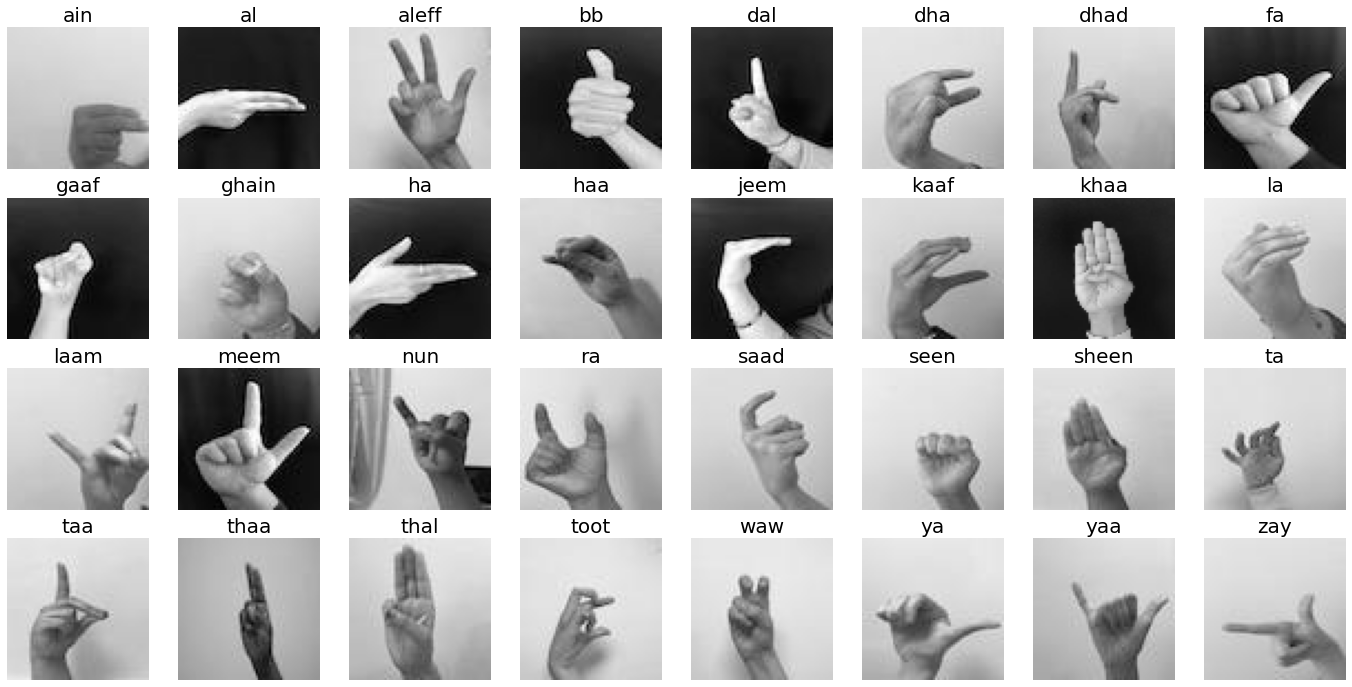

In [11]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

Evaluation images: 


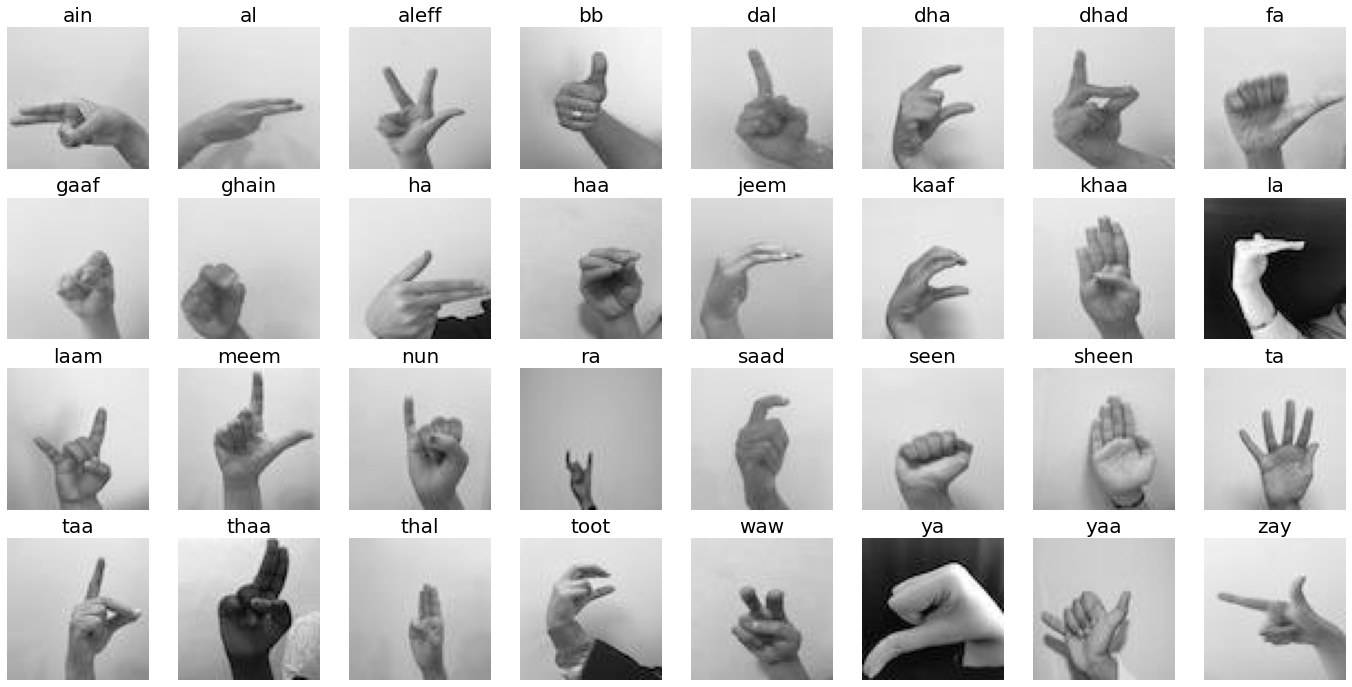

In [12]:
print("Evaluation images: ")
print_images(image_list = X_eval)

In [13]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [14]:
print(y_train[0])
print(len(y_train[0]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
32


In [15]:
X_train = X_train.astype('float64')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [16]:
init_weights_kernel = tf.keras.initializers.RandomNormal(mean = 0.0, stddev = 0.02)


In [17]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from tensorflow.keras import layers
from tensorflow.keras.models import Model

model = tf.keras.Sequential()

model.add(layers.Input(shape = (100, )))
model.add(layers.Dense(4 * 4 * 256))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Reshape((4, 4, 256)))

model.add(layers.Conv2DTranspose(128, kernel_size = 4, padding = 'same', strides = 2,
                                     kernel_initializer = init_weights_kernel , use_bias = False))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
    
model.add(layers.Conv2DTranspose(64, kernel_size = 4, padding = 'same', strides = 2,
                                     kernel_initializer = init_weights_kernel, use_bias = False))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
    
model.add(layers.Conv2DTranspose(32, kernel_size = 4, padding = 'same', strides = 2,
                                     kernel_initializer = init_weights_kernel, use_bias = False))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Conv2DTranspose(100, kernel_size = 1, activation = 'softmax'))
   
model.add(Dense(100, activation='softmax'))

model.add(Dropout(0.5))
model.add(Flatten())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              413696    
                                                                 
 batch_normalization (BatchN  (None, 4096)             16384     
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524288    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 128)        5

In [18]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
hist = model.fit(X_train, y_train, epochs = 50, batch_size = 64)


Epoch 1/50


ValueError: ignored

In [ ]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

In [ ]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

In [ ]:
y_eval_pred = model.predict(X_eval, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)